# Automatizovaná detekce rotace DH PSF

In [2]:
from PSFrot import PSFrot
import proplot as pplt
import numpy as np 
from skimage.draw import circle_perimeter
from skimage.color import rgb2gray, gray2rgb

Jako první byl aplikován následující postup.

1. Po načtení obrázku byl obrázek pomocí prahování (funkce `threshold`) převeden na binární masku.

2. Byla využita funkce pro najití kružnic. Ta využívá metody `hough_circle` a `hough_circle_peaks` knihovny Scikit-image.

3. Následně byl úhel natočení odečtěn pomocí středů najitých kružnic.

-79.99202019855866
-90.0
0.0
113.96248897457819
116.56505117707799
-66.03751102542182
90.0
82.8749836510982
-81.86989764584403
53.13010235415598


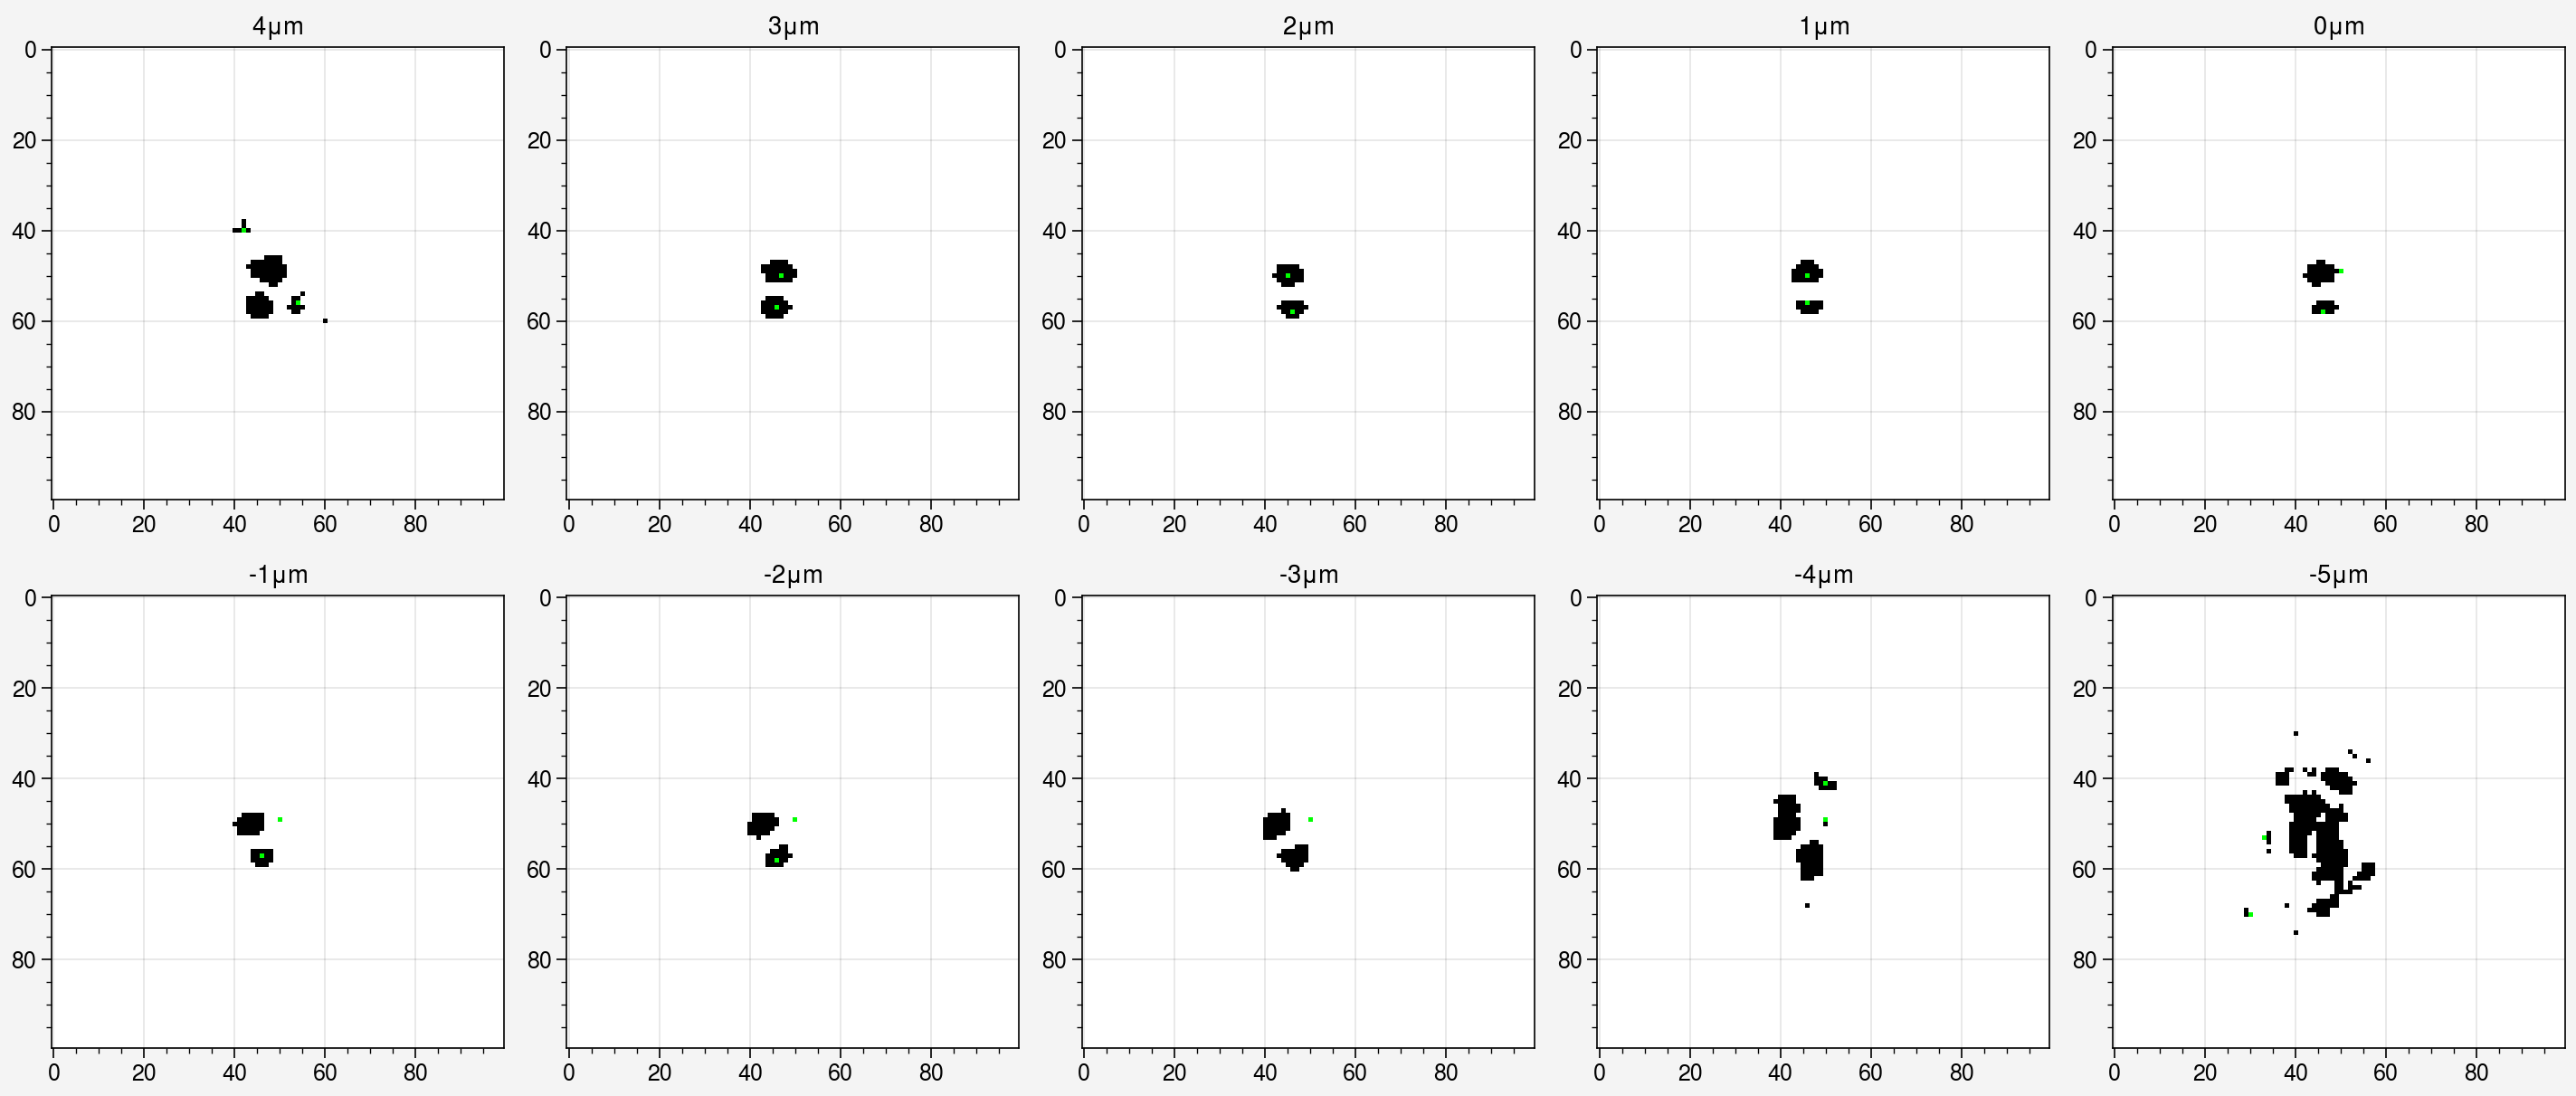

In [4]:
fig, axs = pplt.subplots(nrows=2, ncols=5, share=False)

angles = np.zeros(10)

for i in range(-5, 5):
    filename = "test_imgs/" + str(i) + ".tiff"
    image = PSFrot.readImage(path=filename)
    image = PSFrot.threshold(image, intensity=0.4)
    cx, cy, rad = PSFrot.findCircles(image)
    imC = gray2rgb(image)
    print(np.rad2deg(np.arctan2(cy[1] - cy[0], cx[1] - cx[0])))
    for cx, cy in zip(cx, cy):
        imC[cy, cx] = (0, 1., 0)
    axs[i//5, 4-i % 5].imshow(imC)
    axs[i//5, 4-i % 5].format(title=str(i) + " $\mu$m")

fig.save("vysl.png", dpi=333)


zkusit separovat jednotlivé bloby a spočítat těžiště.

Použít segmentační techniky [například tyto](https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_morphsnakes.html#sphx-glr-auto-examples-segmentation-plot-morphsnakes-py)

Jelikož na obrázku s defokusací -1 a -2 $\mathrm{\mu m}$  lze vidět špatné rozeznání středu je třeba přidat další krok. 

In [12]:
from skimage import data
from skimage.exposure import histogram
import matplotlib.pyplot as plt 
coins = data.coins()
hist, hist_centers = histogram(coins)

In [7]:
from skimage.feature import canny
edges = canny(coins/255.)

In [8]:
from scipy import ndimage as ndi
fill_coins = ndi.binary_fill_holes(edges)
plt.imshow(fill_coins)

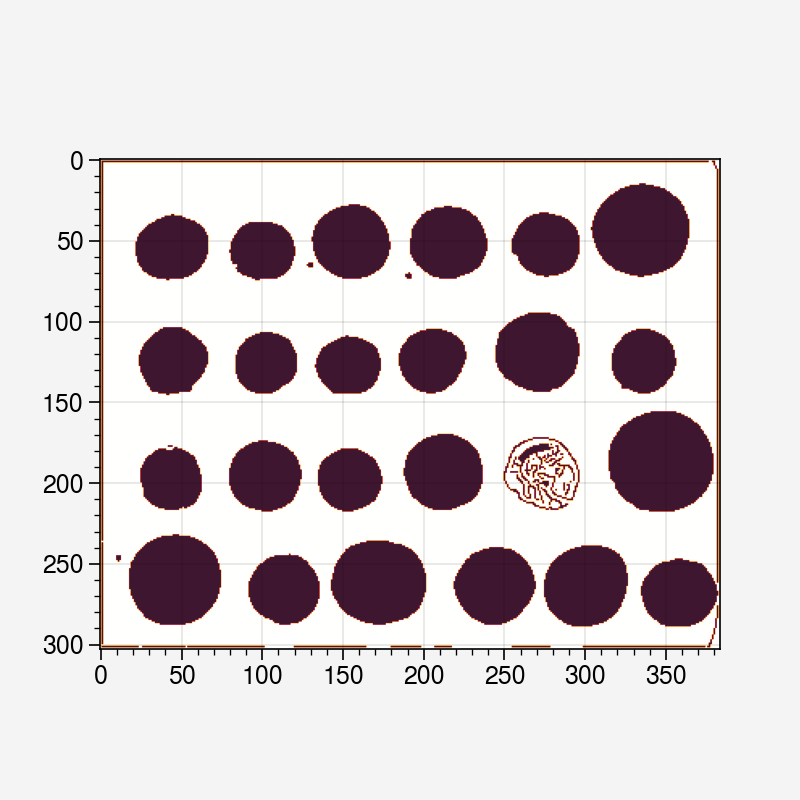

In [19]:
label_objects, nb_labels = ndi.label(fill_coins)

In [26]:
label_objects == 1


array([[False, False, False, ..., False, False, False],
       [False,  True,  True, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [28]:
i = -2
filename = "test_imgs/" + str(i) + ".tiff"
image = PSFrot.readImage(path=filename)
image = PSFrot.threshold(image, intensity=0.4)
cx, cy, rad = PSFrot.findCircles(image)
imC = gray2rgb(image)

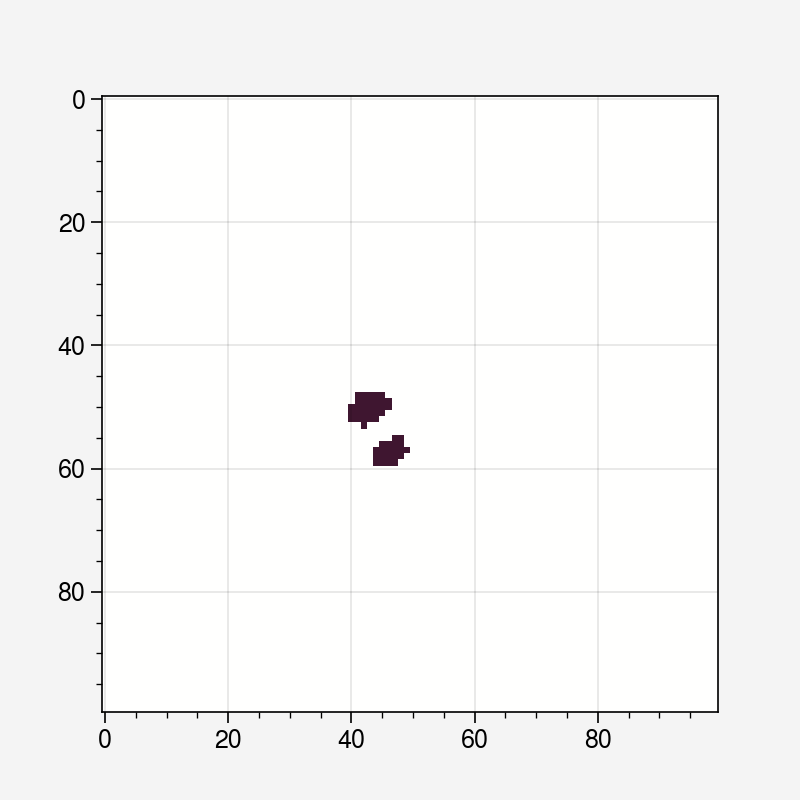

In [39]:
fill_psf = np.abs(1-image)
plt.imshow(fill_psf)

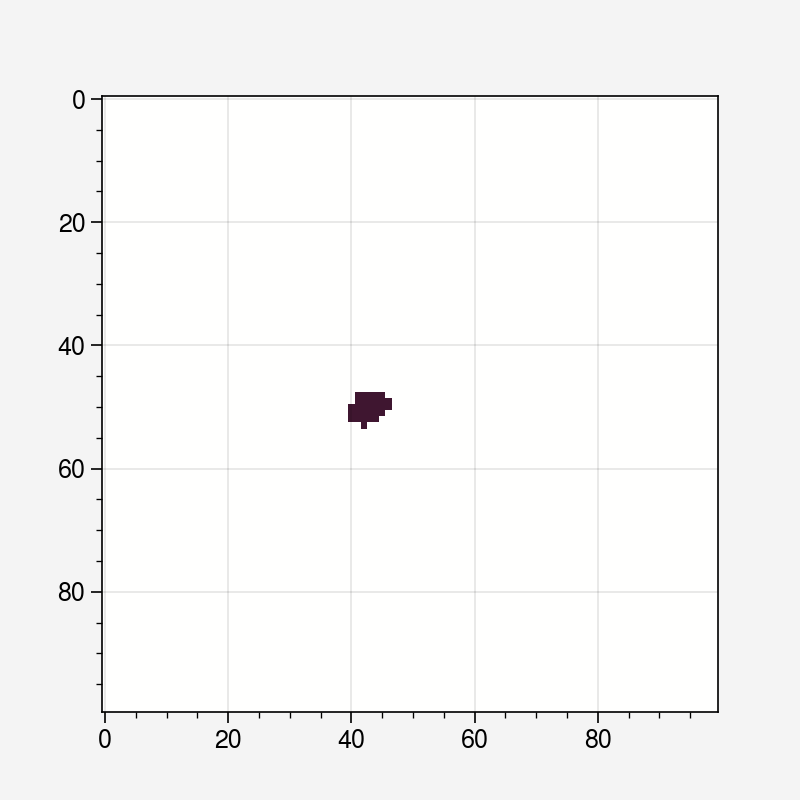

In [44]:
# fill_psf = ndi.binary_fill_holes(image)
label_objects, nb_labels = ndi.label(fill_psf)
plt.imshow(label_objects*(label_objects == 1))